Importing libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset

In [36]:
dataInfo = pd.read_csv("terrorism.csv", encoding="ISO-8859-1")

C:\Users\polis\AppData\Local\Temp\ipykernel_16208\1189208620.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  dataInfo = pd.read_csv("terrorism.csv", encoding="ISO-8859-1")


In [37]:
dataInfo

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [38]:
dataInfo.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [39]:
dataInfo.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [40]:
dataInfo.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

Checking null values

In [41]:
dataInfo.isnull().sum().sort_values(ascending = True)

eventid                  0
crit3                    0
success                  0
suicide                  0
attacktype1              0
                     ...  
weaptype4_txt       181618
weaptype4           181618
weapsubtype4        181621
weapsubtype4_txt    181621
gsubname3           181671
Length: 135, dtype: int64

Data Exploration and Data preprocessing

In [42]:
dataInfo.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [43]:
dataInfo=dataInfo[['Year','Month','Day','Country','state','Region','city','AttackType','Killed',
        'Target','Group','Target_type','Weapon_type']]

In [44]:
dataInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   AttackType   181691 non-null  object 
 8   Killed       171378 non-null  float64
 9   Target       181055 non-null  object 
 10  Group        181691 non-null  object 
 11  Target_type  181691 non-null  object 
 12  Weapon_type  181691 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 18.0+ MB


In [45]:
dataInfo.head()

,Year,Month,Day,Country,state,Region,city,AttackType,Killed,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


Descriptive statistics

In [46]:
dataInfo.describe()

,Year,Month,Day,Killed
count,181691.000000,181691.000000,181691.000000,171378.000000
mean,2002.638997,6.467277,15.505644,2.403272
std,13.259430,3.388303,8.814045,11.545741
min,1970.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000


In [47]:
dataInfo.isnull().sum().sort_values(ascending= False)

Killed         10313
Target           636
city             434
state            421
Year               0
Month              0
Day                0
Country            0
Region             0
AttackType         0
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [48]:
dataInfo['Target'].fillna('Others',inplace = True)
dataInfo['city'].fillna('Unknown',inplace = True)
dataInfo['state'].fillna('Unknown',inplace = True)
dataInfo['Killed'].fillna(0,inplace = True)

C:\Users\polis\AppData\Local\Temp\ipykernel_16208\1206593666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataInfo['Target'].fillna('Others',inplace = True)
C:\Users\polis\AppData\Local\Temp\ipykernel_16208\1206593666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataInfo['city'].fillna('Unknown',inplace = True)
C:\Users\polis\AppData\Local\Temp\ipykernel_16208\1206593666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [49]:
dataInfo.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
AttackType     0
Killed         0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [50]:
duplicates= dataInfo.duplicated()
duplicates.value_counts()

False    170103
True      11588
dtype: int64

In [51]:
dataInfo.drop_duplicates(inplace= True)

C:\Users\polis\AppData\Local\Temp\ipykernel_16208\342423253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataInfo.drop_duplicates(inplace= True)


In [52]:
duplicates= dataInfo.duplicated()
duplicates.value_counts()

False    170103
dtype: int64

Data Visualisations

Year Attacks

most attacked year is "2014" with number of attacks: "16074" 


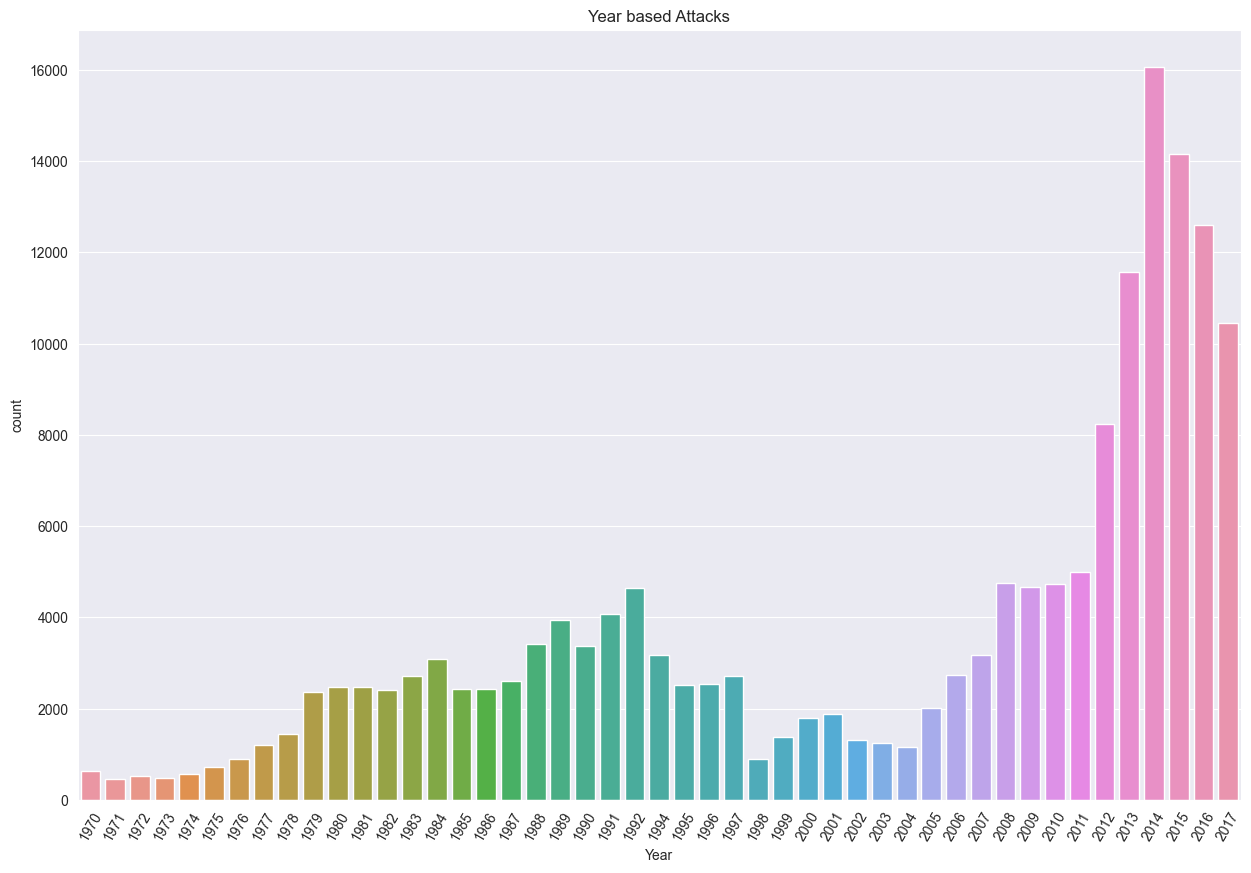

In [53]:
year = dataInfo["Year"].value_counts().sort_values(ascending= False).head(15)
plt.figure(figsize=(15,10))
plt.title("Year based Attacks")
plt.xticks(rotation = 60)
sns.countplot(x = dataInfo["Year"])
print('most attacked year is "{}" with number of attacks: "{}" '.format((year.idxmax()),year.max()))

Month based attacks

most attacked month is "5" with number of attacks: "15564" 


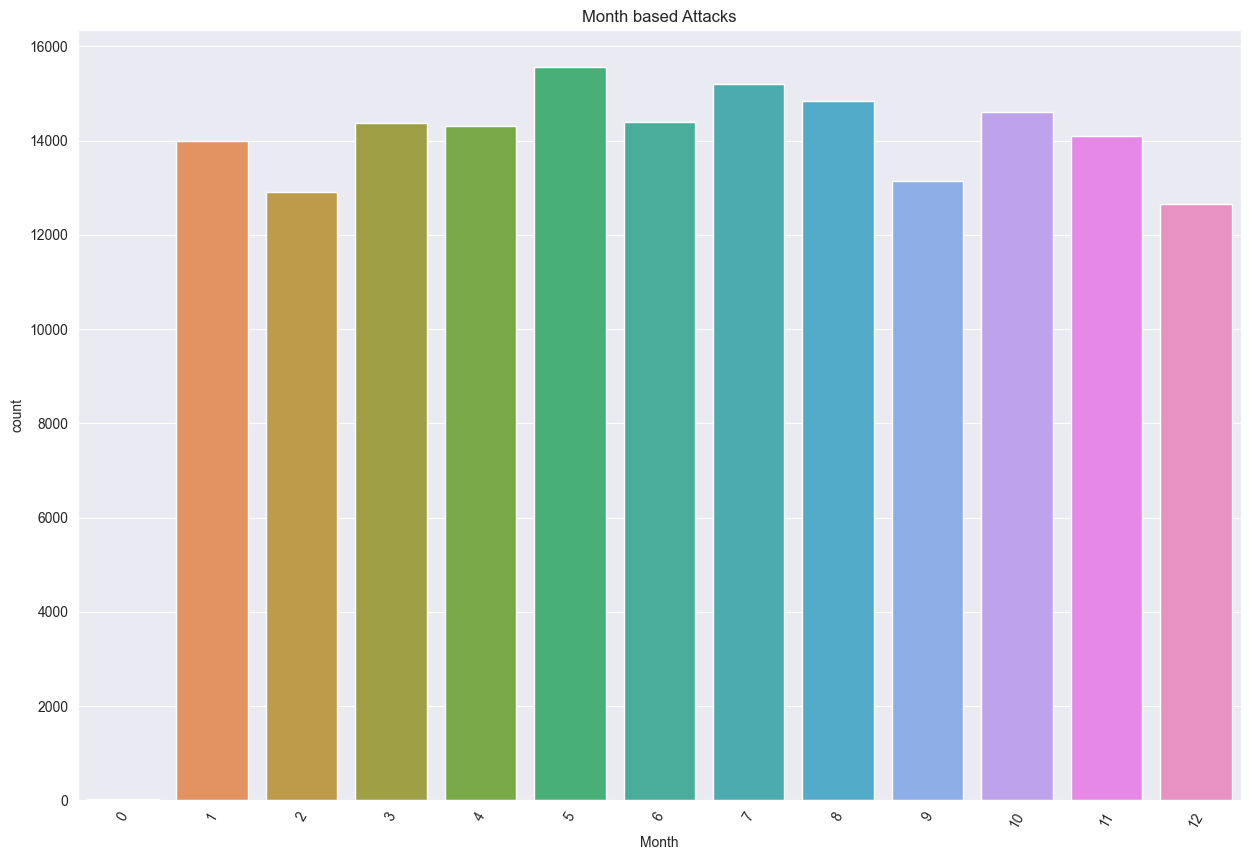

In [54]:
month = dataInfo["Month"].value_counts().sort_values(ascending= False).head(15)
plt.figure(figsize=(15, 10))
plt.title("Month based Attacks")
plt.xticks(rotation=60)
sns.countplot(x = dataInfo["Month"])
print('most attacked month is "{}" with number of attacks: "{}" '.format((month.idxmax()),month.max()))

Most used weapon type

most used weapon type is "Explosives" with number of times: "84771" 


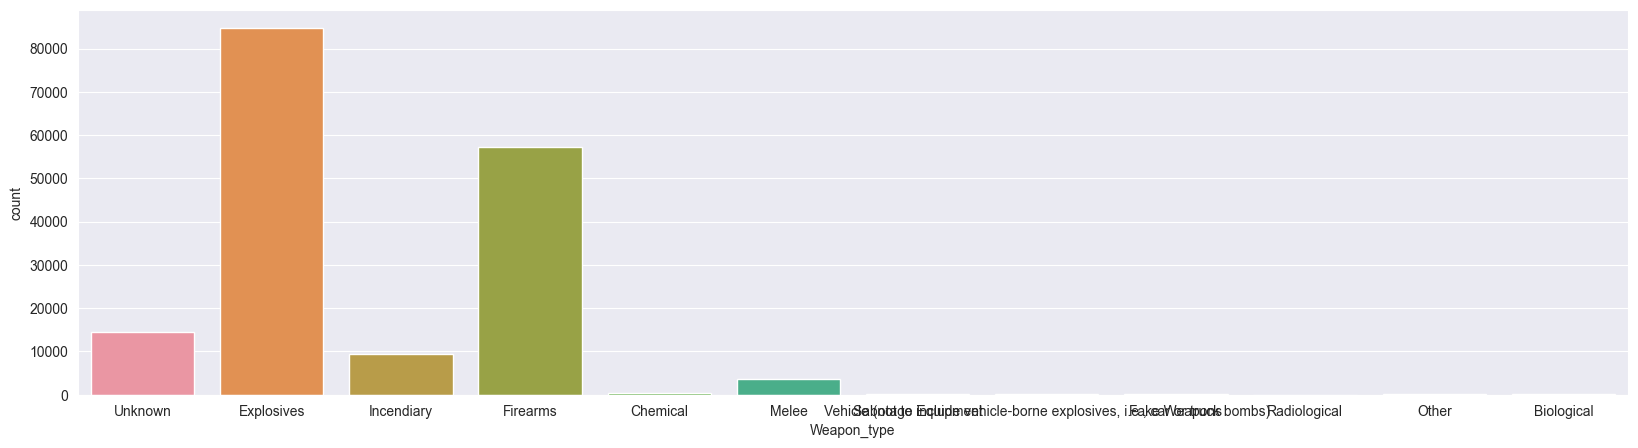

In [60]:
weaponType = dataInfo["Weapon_type"].value_counts().sort_values(ascending= False).head(15)
plt.figure(figsize=(20,5))
sns.countplot(x=dataInfo["Weapon_type"])
print('most used weapon type is "{}" with number of times: "{}" '.format((weaponType.idxmax()),weaponType.max()))

most attacked country

most attacked country is "Iraq" with number of times: "22736" 


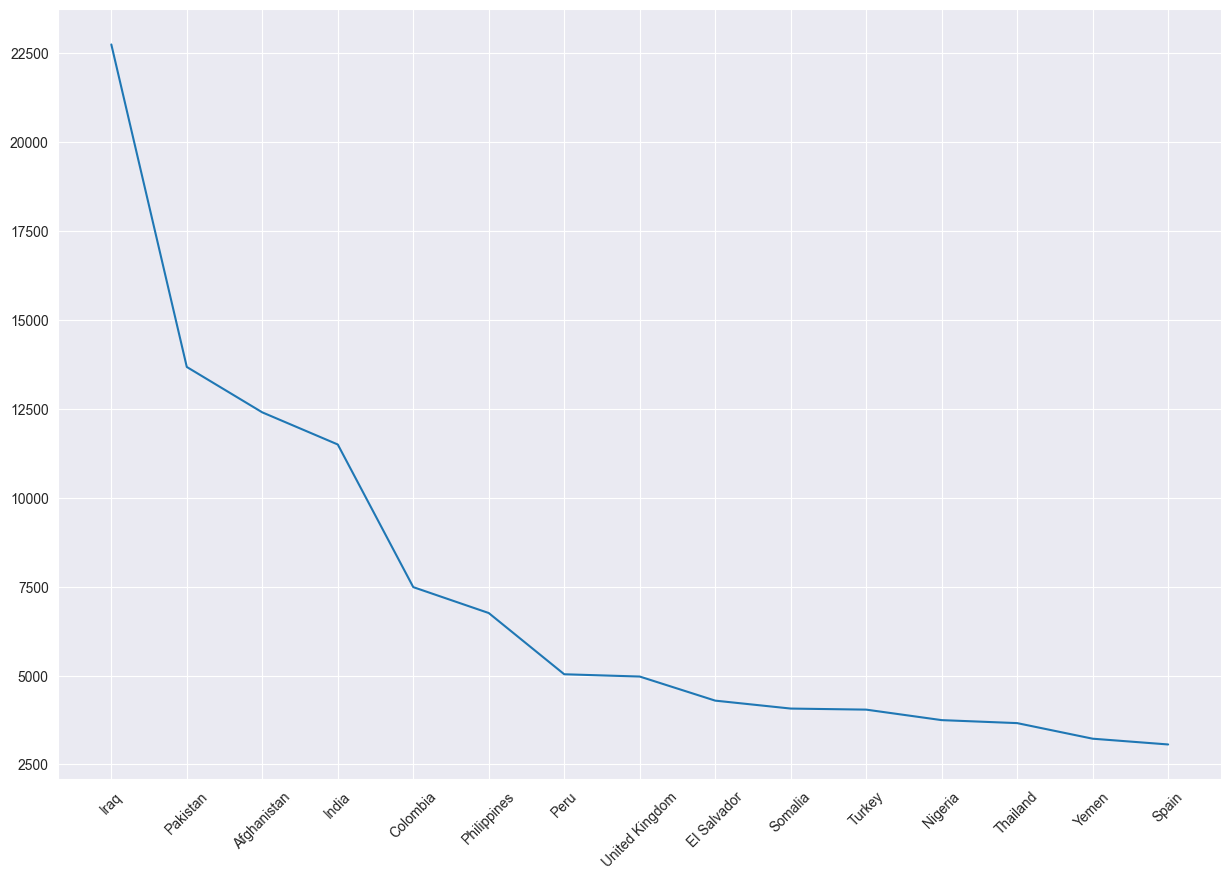

In [56]:
country = dataInfo["Country"].value_counts().sort_values(ascending= False).head(15)
print('most attacked country is "{}" with number of times: "{}" '.format((country.idxmax()),country.max()))
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
plt.plot(country)

top states with most attacks

Baghdad                                7224
Northern Ireland                       4276
Unknown                                4180
Balochistan                            3649
Saladin                                3097
Khyber Pakhtunkhwa                     3019
Nineveh                                2947
Diyala                                 2843
Al Anbar                               2798
Sindh                                  2690
Federally Administered Tribal Areas    2352
Jammu and Kashmir                      2340
Lima                                   1960
Punjab                                 1683
Banaadir                               1570
Name: state, dtype: int64


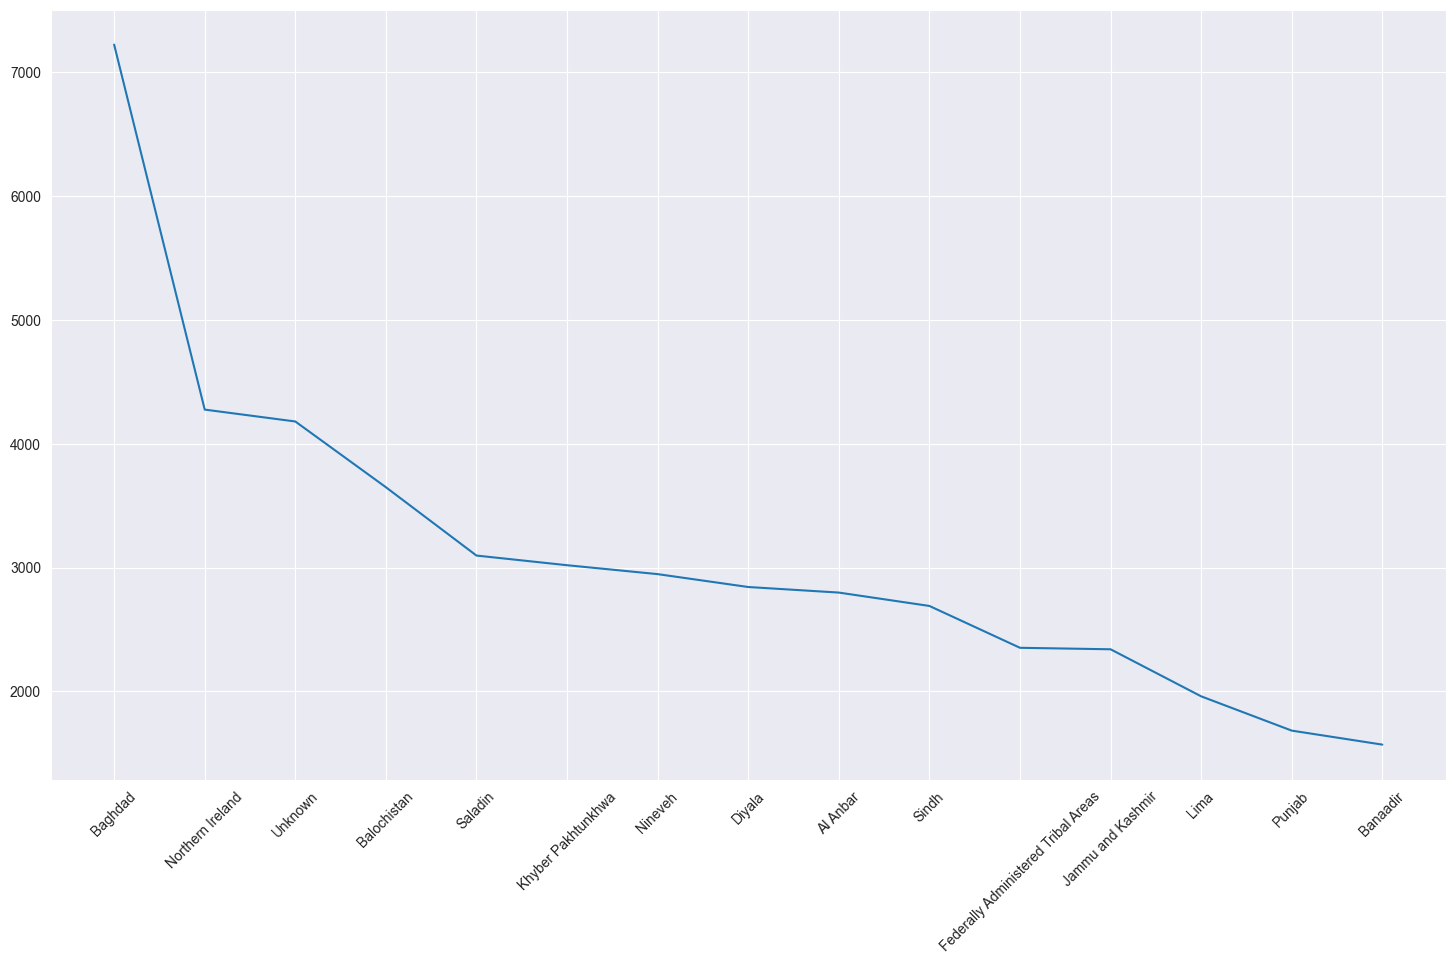

In [57]:
state = dataInfo['state'].value_counts().sort_values(ascending= False).head(15)
print(state)
plt.figure(figsize=(18,10))
plt.xticks(rotation = 45)
plt.plot(state)

top 15 attack types

Bombing/Explosion                      80591
Armed Assault                          41125
Assassination                          18883
Hostage Taking (Kidnapping)            10941
Facility/Infrastructure Attack          9179
Unknown                                 6870
Hostage Taking (Barricade Incident)      937
Unarmed Assault                          928
Hijacking                                649
Name: AttackType, dtype: int64


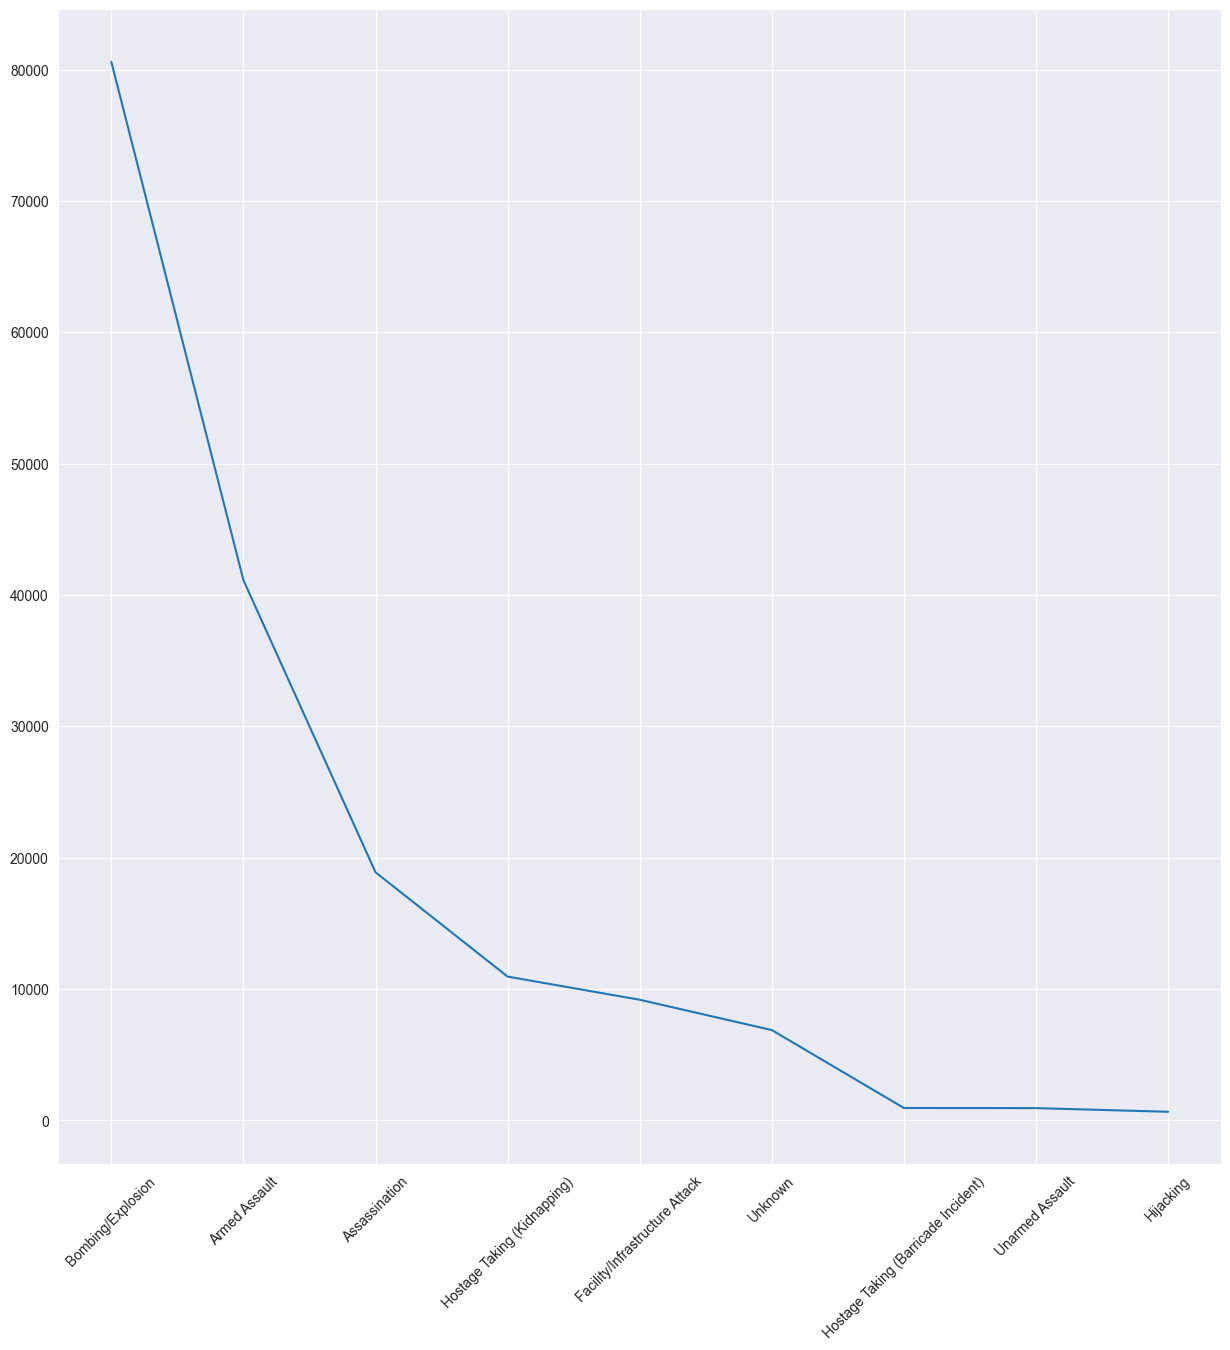

In [58]:
attackType = dataInfo['AttackType'].value_counts().sort_values(ascending = False).head(15)
print(attackType)
plt.figure(figsize=(15,15))
plt.xticks(rotation = 45)
plt.plot(attackType)

top 15 target types

Private Citizens & Property       40594
Military                          27352
Police                            23646
Government (General)              20406
Business                          18743
Transportation                     6062
Unknown                            5030
Religious Figures/Institutions     4247
Educational Institution            4121
Utilities                          4107
Government (Diplomatic)            3509
Terrorists/Non-State Militia       2981
Journalists & Media                2882
Violent Political Party            1794
Airports & Aircraft                1317
Name: Target_type, dtype: int64


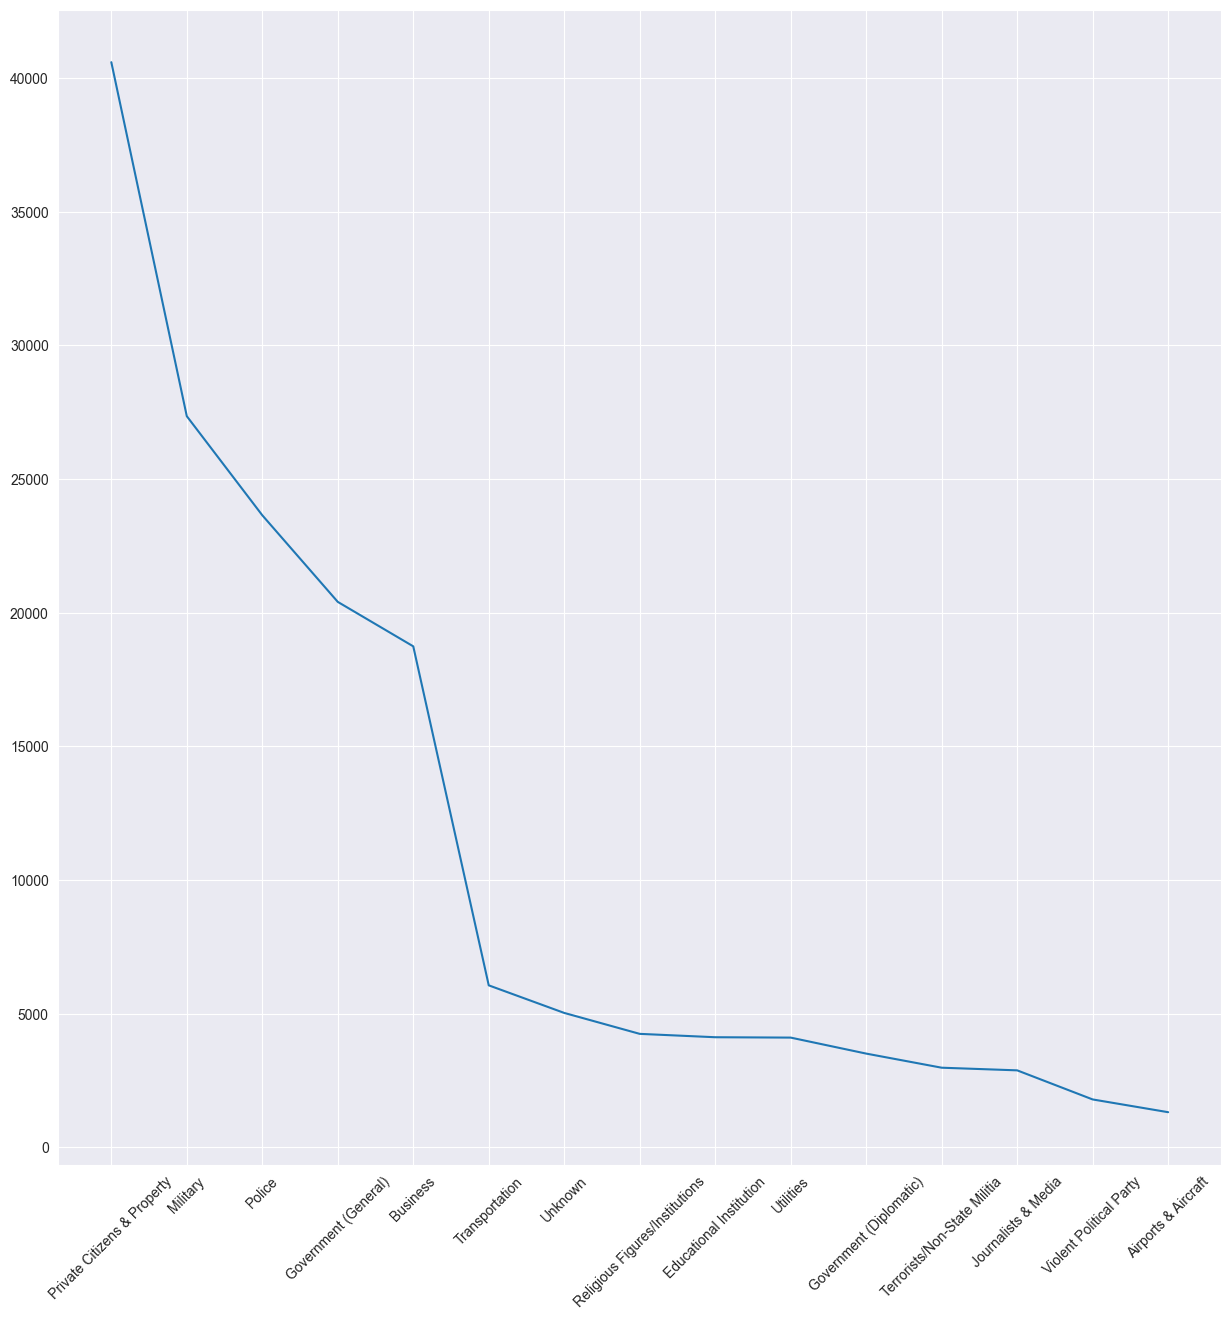

In [59]:
targetType = dataInfo['Target_type'].value_counts().sort_values(ascending = False).head(15)
print(targetType)
plt.figure(figsize=(15,15))
plt.xticks(rotation = 45)
plt.plot(targetType)